In [6]:
#Packages
import pandas as pd
import random
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [5]:
#Get Data 
df = pd.read_clipboard()
df.head()

,movie,name,rating (1-worst; 5-best)
0,Titanic,Kristian,4
1,Parasite,valerie,5
2,Praxis Dr. Hasenbein,Philipp,7
3,About Time,Kulissara,4
4,It,Kuissara,3


**Movie Recommender 1: random**

In [7]:
# not with uniform probabilities
i = random.randint(0, len(df.index)-1)
df.iloc[i]['movie']

'It'

In [8]:
# pick multiple random rows
df['movie'].sample(3).values

array(['Dune', 'Shining', 'Benjamin Button'], dtype=object)

In [9]:
# with uniform probabilities
names = df['movie'].unique()
random.choice(names)

'Citizen One'

**Movie Recommender 2: find the best movies**

In [10]:
# Sorting 
df.sort_values(by='rating (1-worst; 5-best)', ascending=False).head(5)

,movie,name,rating (1-worst; 5-best)
2,Praxis Dr. Hasenbein,Philipp,7
60,enemy at the gates,Dina,5
36,The Simpsons,Inbal,5
22,Kill Bill,Dina,5
25,Too big too fail,Inga,5


In [11]:
# Sampling by rating
df[df['rating (1-worst; 5-best)'] == 5].sample(3)

,movie,name,rating (1-worst; 5-best)
55,Silence of the lambs,Stephan,5
42,Dumm und Dümmer,Radek,5
48,Parasite,Chinh,5


In [12]:
# Average Rating
df.groupby('movie')['rating (1-worst; 5-best)'].mean().sort_values(ascending=False).head(10)

movie
Praxis Dr. Hasenbein    7.0
End game                5.0
Parasite                5.0
Lucky number sleven     5.0
Lord of the Rings       5.0
Life of Brian           5.0
Too big too fail        5.0
Shining                 5.0
John Wick               5.0
Silence of the lambs    5.0
Name: rating (1-worst; 5-best), dtype: float64

**Movie Recommender 3: also consider the number of votes**


In [13]:
meancount = df.groupby('movie')['rating (1-worst; 5-best)'].agg(['mean','count', 'min', 'max'])
meancount.head(3)

,mean,count,min,max
movie,,,,
300,1.0,1,1,1
About Time,4.0,1,4,4
Alien 2,5.0,1,5,5


In [14]:
mc = meancount.sort_values(by=['mean','count'], ascending=[False, False]).head(5)
mc.head()

,mean,count,min,max
movie,,,,
Praxis Dr. Hasenbein,7.0,1,7,7
Lord of the Rings,5.0,3,5,5
Carnage,5.0,2,5,5
John Wick,5.0,2,5,5
Parasite,5.0,2,5,5


In [15]:
#We are using a ranking algorithm to combine mean and count into a single number
# R - average rating of a movie
# v - number of votes for one movie
# C - average rating of all movies
# m - threshold hyperparameter(set this manually)

In [16]:
def weighted_rank(R,v,C,m):
    return R * v/(v+m) + C* m/(v+m)

In [17]:
C = df['rating (1-worst; 5-best)'].mean()
m = 100 #experiment with this

print('Praxis Dr. Hasenbein',round(weighted_rank(7.0,1,C,m), 3))
print('Lord of the Rings',round(weighted_rank(5.0,3,C,m), 3))
print('Lord of the Rings II',round(weighted_rank(5.0,1000,C,m), 3))
print('John Wick', round(weighted_rank(2.0,1,C,m), 3))

Praxis Dr. Hasenbein 4.015
Lord of the Rings 4.015
Lord of the Rings II 4.908
John Wick 3.965


In [18]:
## apply the ranking algorithm to an entire df:
# (iterate over the rows OR)

v = mc['count']
R = mc['mean']
m = 1000000.0

ranking = R * v/(v+m)+C *m/(v+m)
ranking.head()


movie
Praxis Dr. Hasenbein    3.985078
Lord of the Rings       3.985078
Carnage                 3.985077
John Wick               3.985077
Parasite                3.985077
dtype: float64

**Neighbourhood-based Search**



In [19]:
multi = df.set_index(['name', 'movie'])['rating (1-worst; 5-best)']
multi.head()


name       movie               
Kristian   Titanic                 4
valerie    Parasite                5
Philipp    Praxis Dr. Hasenbein    7
Kulissara  About Time              4
Kuissara   It                      3
Name: rating (1-worst; 5-best), dtype: int64

In [20]:
matrix = multi.unstack().T.fillna(0)
matrix

name,Chinh,Dina,Hakan,Inbal,Inga,Kristian,Kuissara,Kulissara,Niels,Philipp,Radek,Stephan,valerie
movie,,,,,,,,,,,,,
300,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
About Time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
Alien 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
Angel and Demons,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Another Round,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
Benjamin Button,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Carnage,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Citizen One,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Clockwork Orange,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='name', ylabel='movie'>

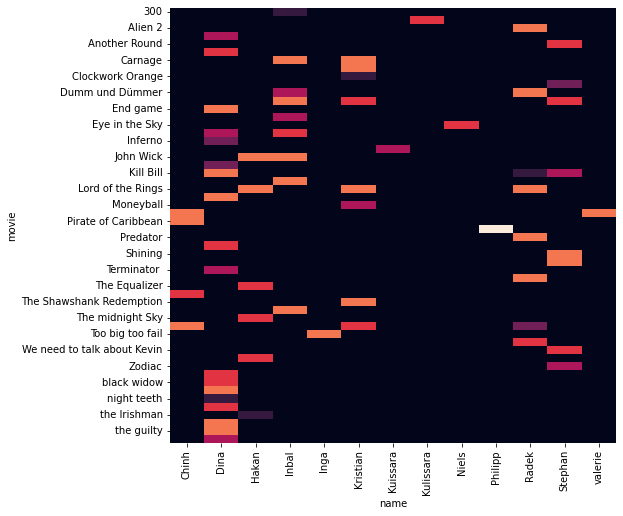

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(matrix, cbar=None)

In [22]:
## how to create recommendations based on user similarities
# u1 = 'Hakan'
# go through all users u2 (!= u1) 
#     calculate similarities between u1 and u2 -> sim 
#     (0.0 dissimilar, 1.0 identical)
#     find the user with highest similarity -> u_best
# sort the movies rated by u_best by rating 
# recommend a few of them 

# variation: consider the K most similar users instead(K Nearest Neighbors)

In [26]:
# Calculate similarity of two users

user_1 = np.array(pd.DataFrame(matrix['Hakan']))
user_2 = np.array(pd.DataFrame(matrix['Inbal']))
cosine_similarity(user_1, user_2) 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

TypeError: reshape() takes exactly 1 argument (0 given)